Epoch 1/20


c:\Users\skshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7723 - loss: 0.8924 - val_accuracy: 0.9267 - val_loss: 0.2582
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9264 - loss: 0.2572 - val_accuracy: 0.9416 - val_loss: 0.1972
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9445 - loss: 0.1938 - val_accuracy: 0.9537 - val_loss: 0.1618
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9578 - loss: 0.1503 - val_accuracy: 0.9599 - val_loss: 0.1375
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1287 - val_accuracy: 0.9611 - val_loss: 0.1259
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9687 - loss: 0.1095 - val_accuracy: 0.9653 - val_loss: 0.1176
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0976 - val_accuracy: 0.9679 - val_loss: 0.1072
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9777 - loss: 0.0800 - val_accurac

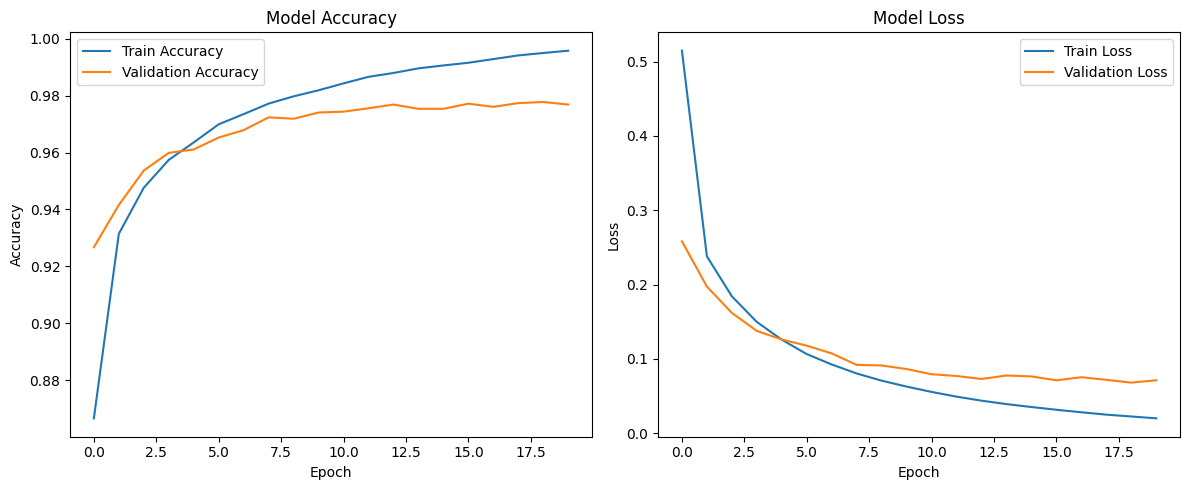

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


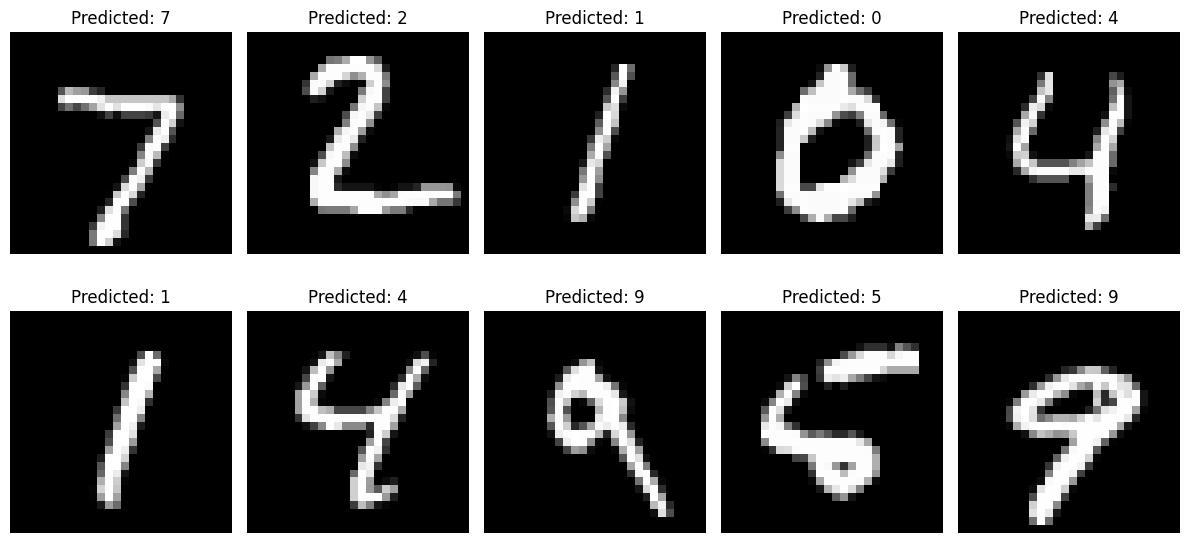

In [1]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# b. Load the training and testing data
# MNIST dataset contains 70,000 28x28 grayscale images in 10 classes, with 60,000 for training and 10,000 for testing
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images to feed into the fully connected network
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(train_images.shape[1],)),  # Input layer
    layers.Dense(256, activation='relu'),  # Hidden layer
    layers.Dense(128, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model using SGD optimizer and sparse categorical crossentropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# d. Train the model using SGD
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

# e. Evaluate the network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# g. Make predictions on the test images
predictions = model.predict(test_images)

# h. Display the first 10 images along with predicted labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()
